In [1]:
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, BSpline, splev, splrep
import numpy as np

from core.lanelet_helpers import LaneletHelpers
from lanelet_test_helpers import get_test_map
from core.feature_extraction import FeatureExtractor

In [2]:
lanelet_map = get_test_map()
feature_extractor = FeatureExtractor(lanelet_map)
initial_lanelet = feature_extractor.lanelet_map.laneletLayer.get(2)
final_lanelet = feature_extractor.lanelet_map.laneletLayer.get(5)
route = feature_extractor.routing_graph.getRoute(initial_lanelet, final_lanelet)
path = route.shortestPath()

In [3]:
final_point = path[-1].centerline[-1]
points = [(p.x, p.y) for l in path for p in list(l.centerline)[:-1]] \
         + [(final_point.x, final_point.y)]

#points = [(0, 1)] + points
x, y = list(zip(*points))

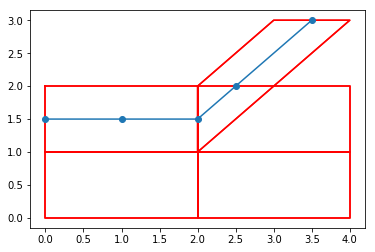

In [4]:
for l in lanelet_map.laneletLayer:
    LaneletHelpers.plot(l)
    
plt.plot(x, y, '-o')

In [5]:
t = np.concatenate(([0], np.cumsum(np.linalg.norm(np.diff(points, axis=0), axis=1))))

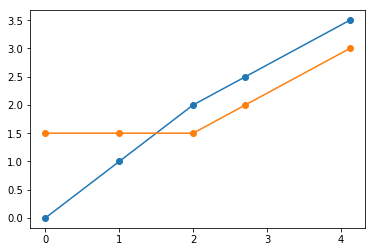

In [6]:
plt.plot(t, x, '-o')
plt.plot(t, y, '-o')

In [7]:
cs_x = CubicSpline(t, x)
cs_y = CubicSpline(t, y)

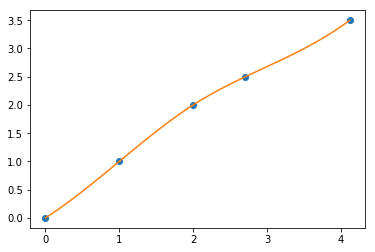

In [8]:
ts = np.linspace(t[0], t[-1])
plt.plot(t, x, 'o')
plt.plot(ts, cs_x(ts))

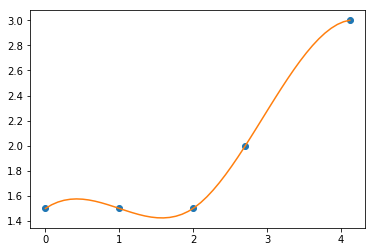

In [9]:
plt.plot(t, y, 'o')
plt.plot(ts, cs_y(ts))

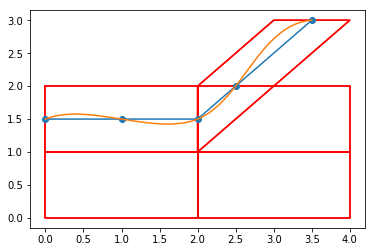

In [10]:
for l in lanelet_map.laneletLayer:
    LaneletHelpers.plot(l)

plt.plot(x, y, '-o')
plt.plot(cs_x(ts), cs_y(ts))

In [11]:
cs_x = CubicSpline(t, x, bc_type=((1, 1), (1, 1)))
cs_y = CubicSpline(t, y, bc_type=((1, 0), (1, 1)))

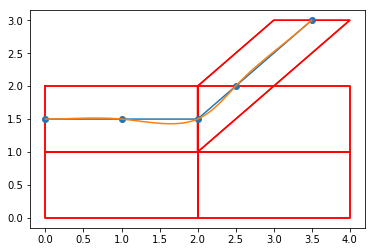

In [12]:
for l in lanelet_map.laneletLayer:
    LaneletHelpers.plot(l)

plt.plot(x, y, '-o')
plt.plot(cs_x(ts), cs_y(ts))

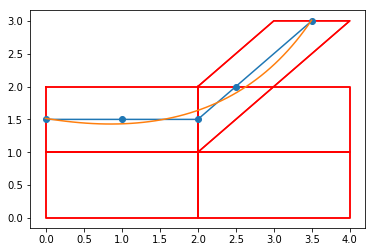

In [13]:
# smoothed spline
s = 1
spl_x = splrep(t, x, s=s)
spl_y = splrep(t, y, s=s)

xs = splev(ts, spl_x)
ys = splev(ts, spl_y)


for l in lanelet_map.laneletLayer:
    LaneletHelpers.plot(l)

plt.plot(x, y, '-o')
plt.plot(xs, ys)

In [14]:
spl_x[0]

array([0.        , 0.        , 0.        , 0.        , 4.12132034,
       4.12132034, 4.12132034, 4.12132034])

In [15]:
spl_y[0]

array([0.        , 0.        , 0.        , 0.        , 4.12132034,
       4.12132034, 4.12132034, 4.12132034])

In [16]:
t

array([0.        , 1.        , 2.        , 2.70710678, 4.12132034])

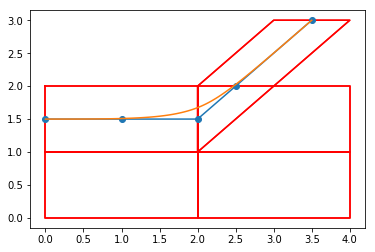

In [17]:
# b spline
l = len(x) 
t2 = np.linspace(0, 1, l - 2, endpoint=True)
t2=np.append([0,0,0],t2)
t2=np.append(t2,[1,1,1])
tck = [t2, [x, y], 3]

u3 = np.linspace(0,1,(max(l*2,70)),endpoint=True)

xs, ys = splev(u3, tck)


for l in lanelet_map.laneletLayer:
    LaneletHelpers.plot(l)
    
plt.plot(x, y, '-o')
plt.plot(xs, ys)

In [18]:
x

(0.0, 1.0, 2.0, 2.5, 3.5)